# Neural Networks - Gas Turbine assignment

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as featmg/m3 25.90 119.91 65.29

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('gas_turbines.csv')

In [4]:
data.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [5]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
data.shape

(15039, 11)

In [7]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [8]:
data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [10]:
data[data.duplicated()].shape

(0, 11)

In [11]:
data.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

# Data Visualization

## Univariate analysis

In [12]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

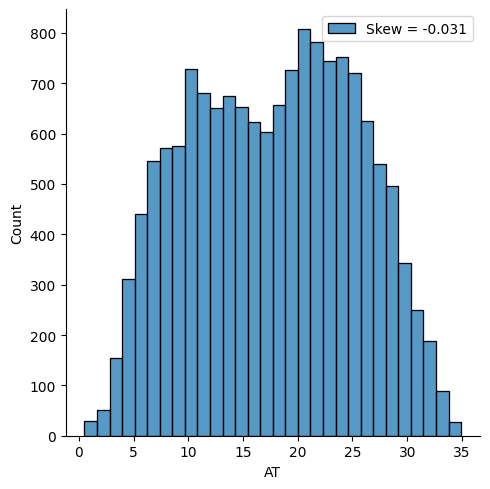

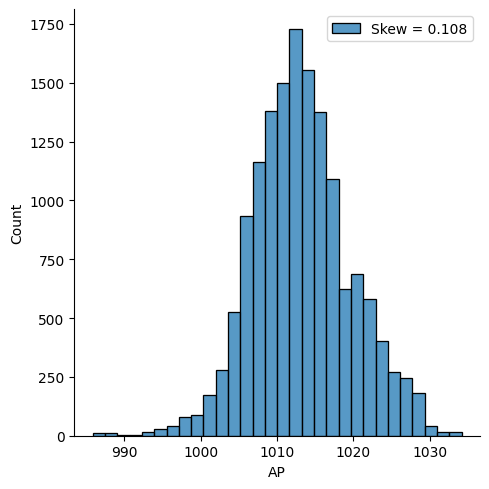

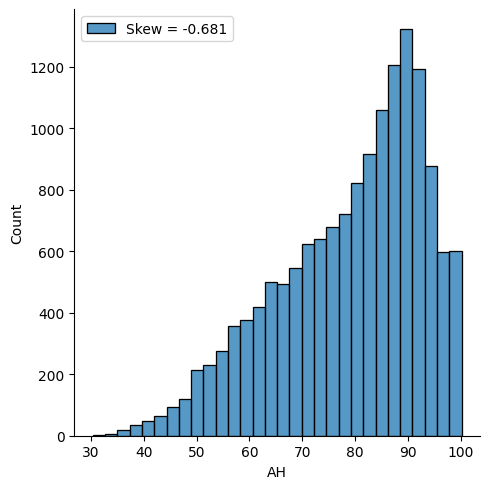

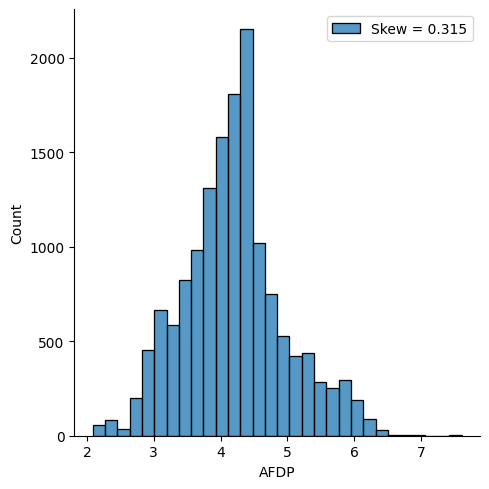

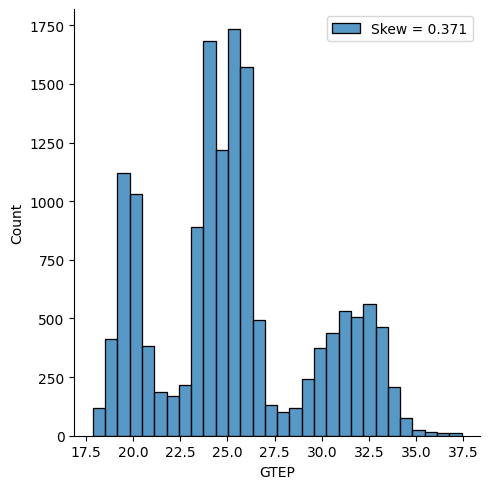

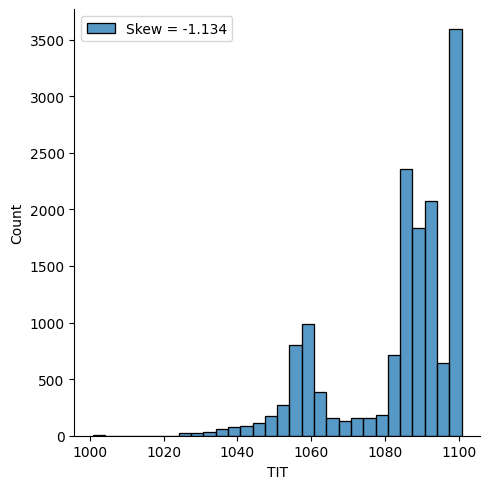

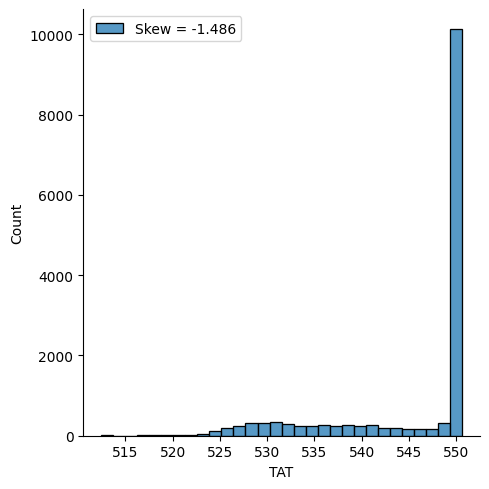

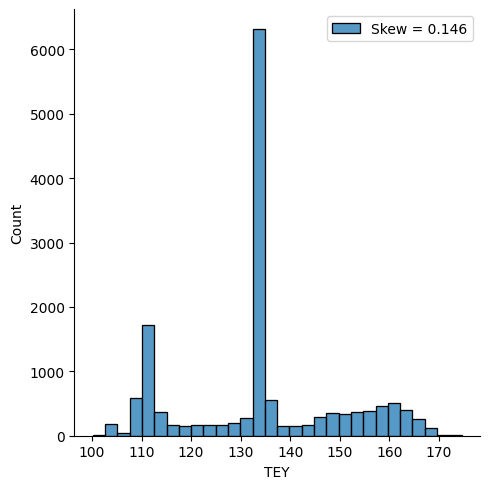

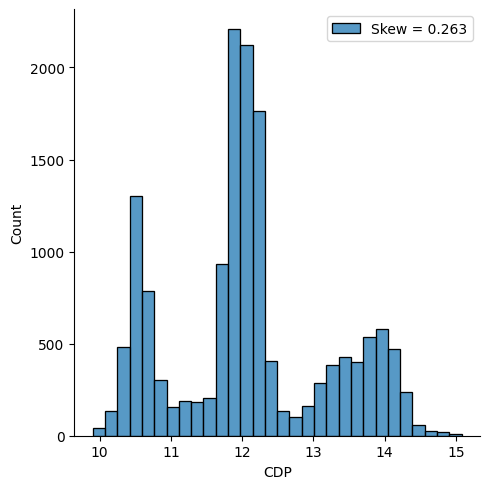

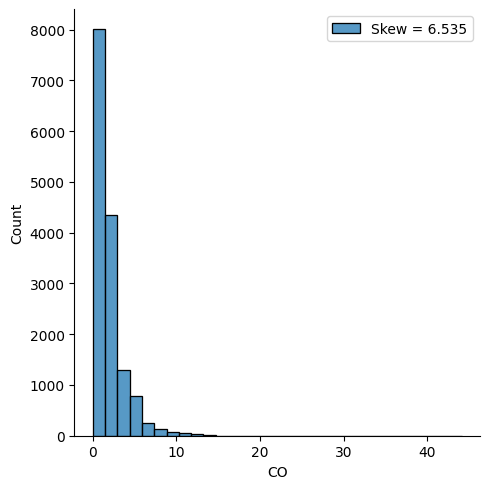

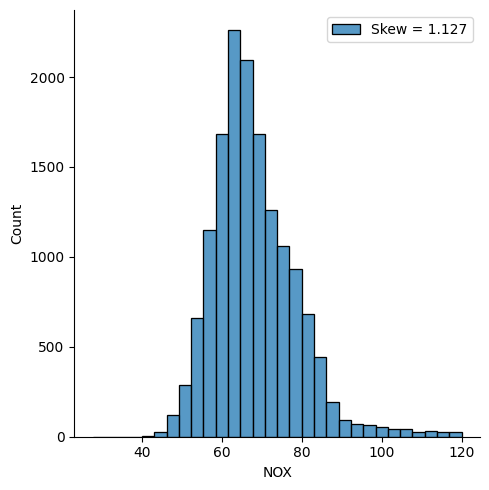

In [13]:
for var in data.columns:
    skew = data[var].skew()
    sns.displot(data[var], kde = False, label = 'Skew = %.3f' %(skew), bins = 30)
    plt.legend(loc = 'best')
    plt.show()

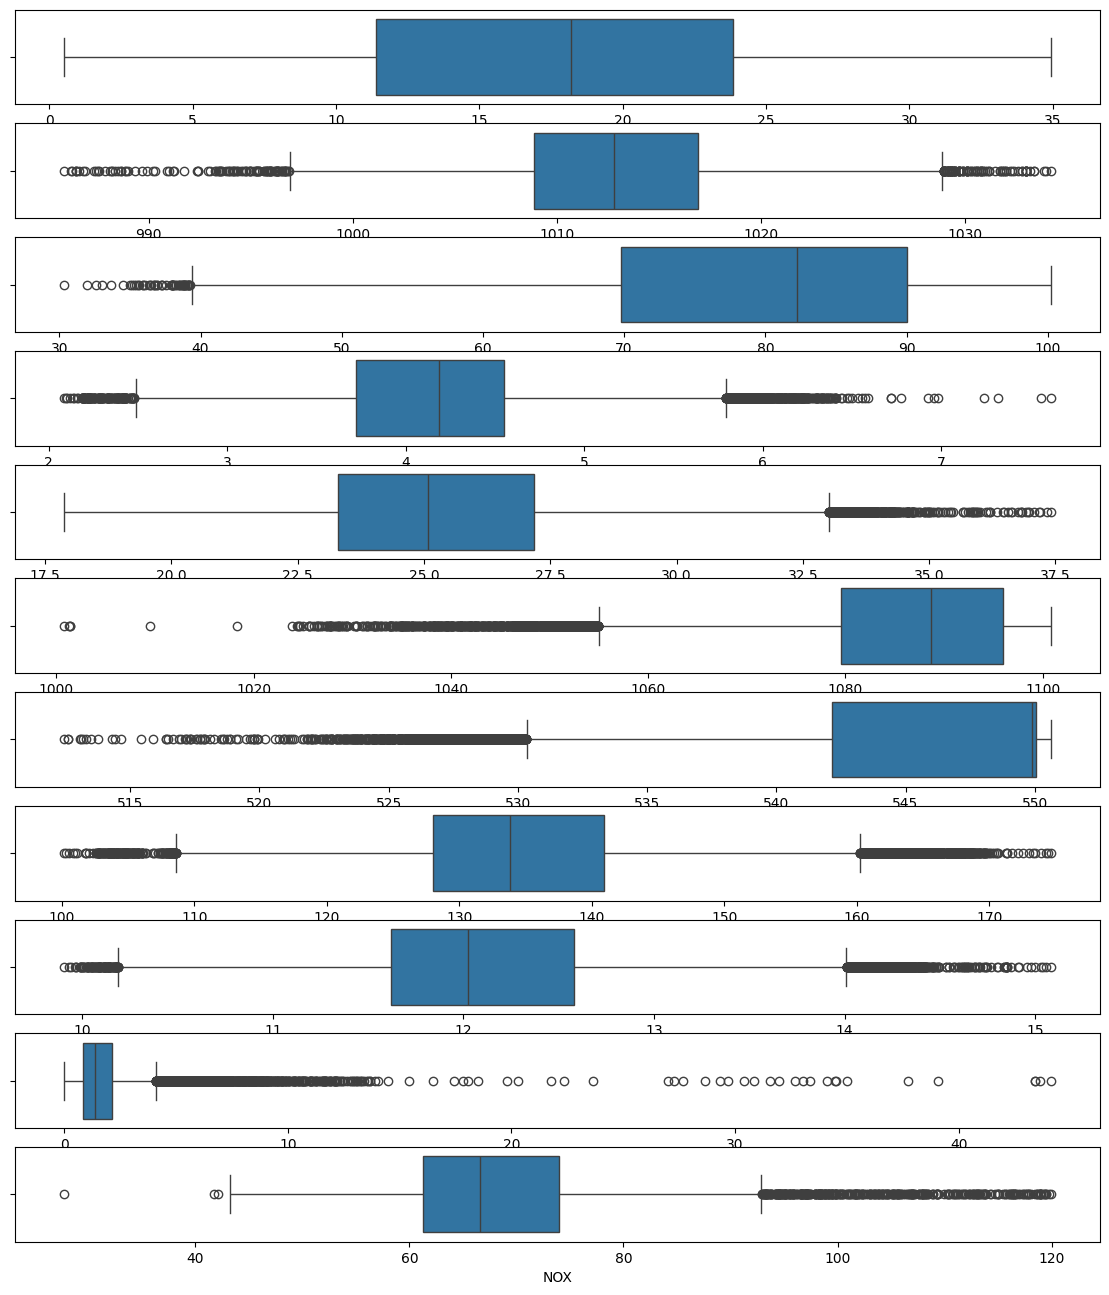

In [14]:
fig, axes = plt.subplots(11,1, figsize = (14, 16), sharex = False, sharey = False)
i = 0
for var in data.columns:
    sns.boxplot(x = var, data = data, ax = axes[i])
    i += 1

## Multivariate analysis

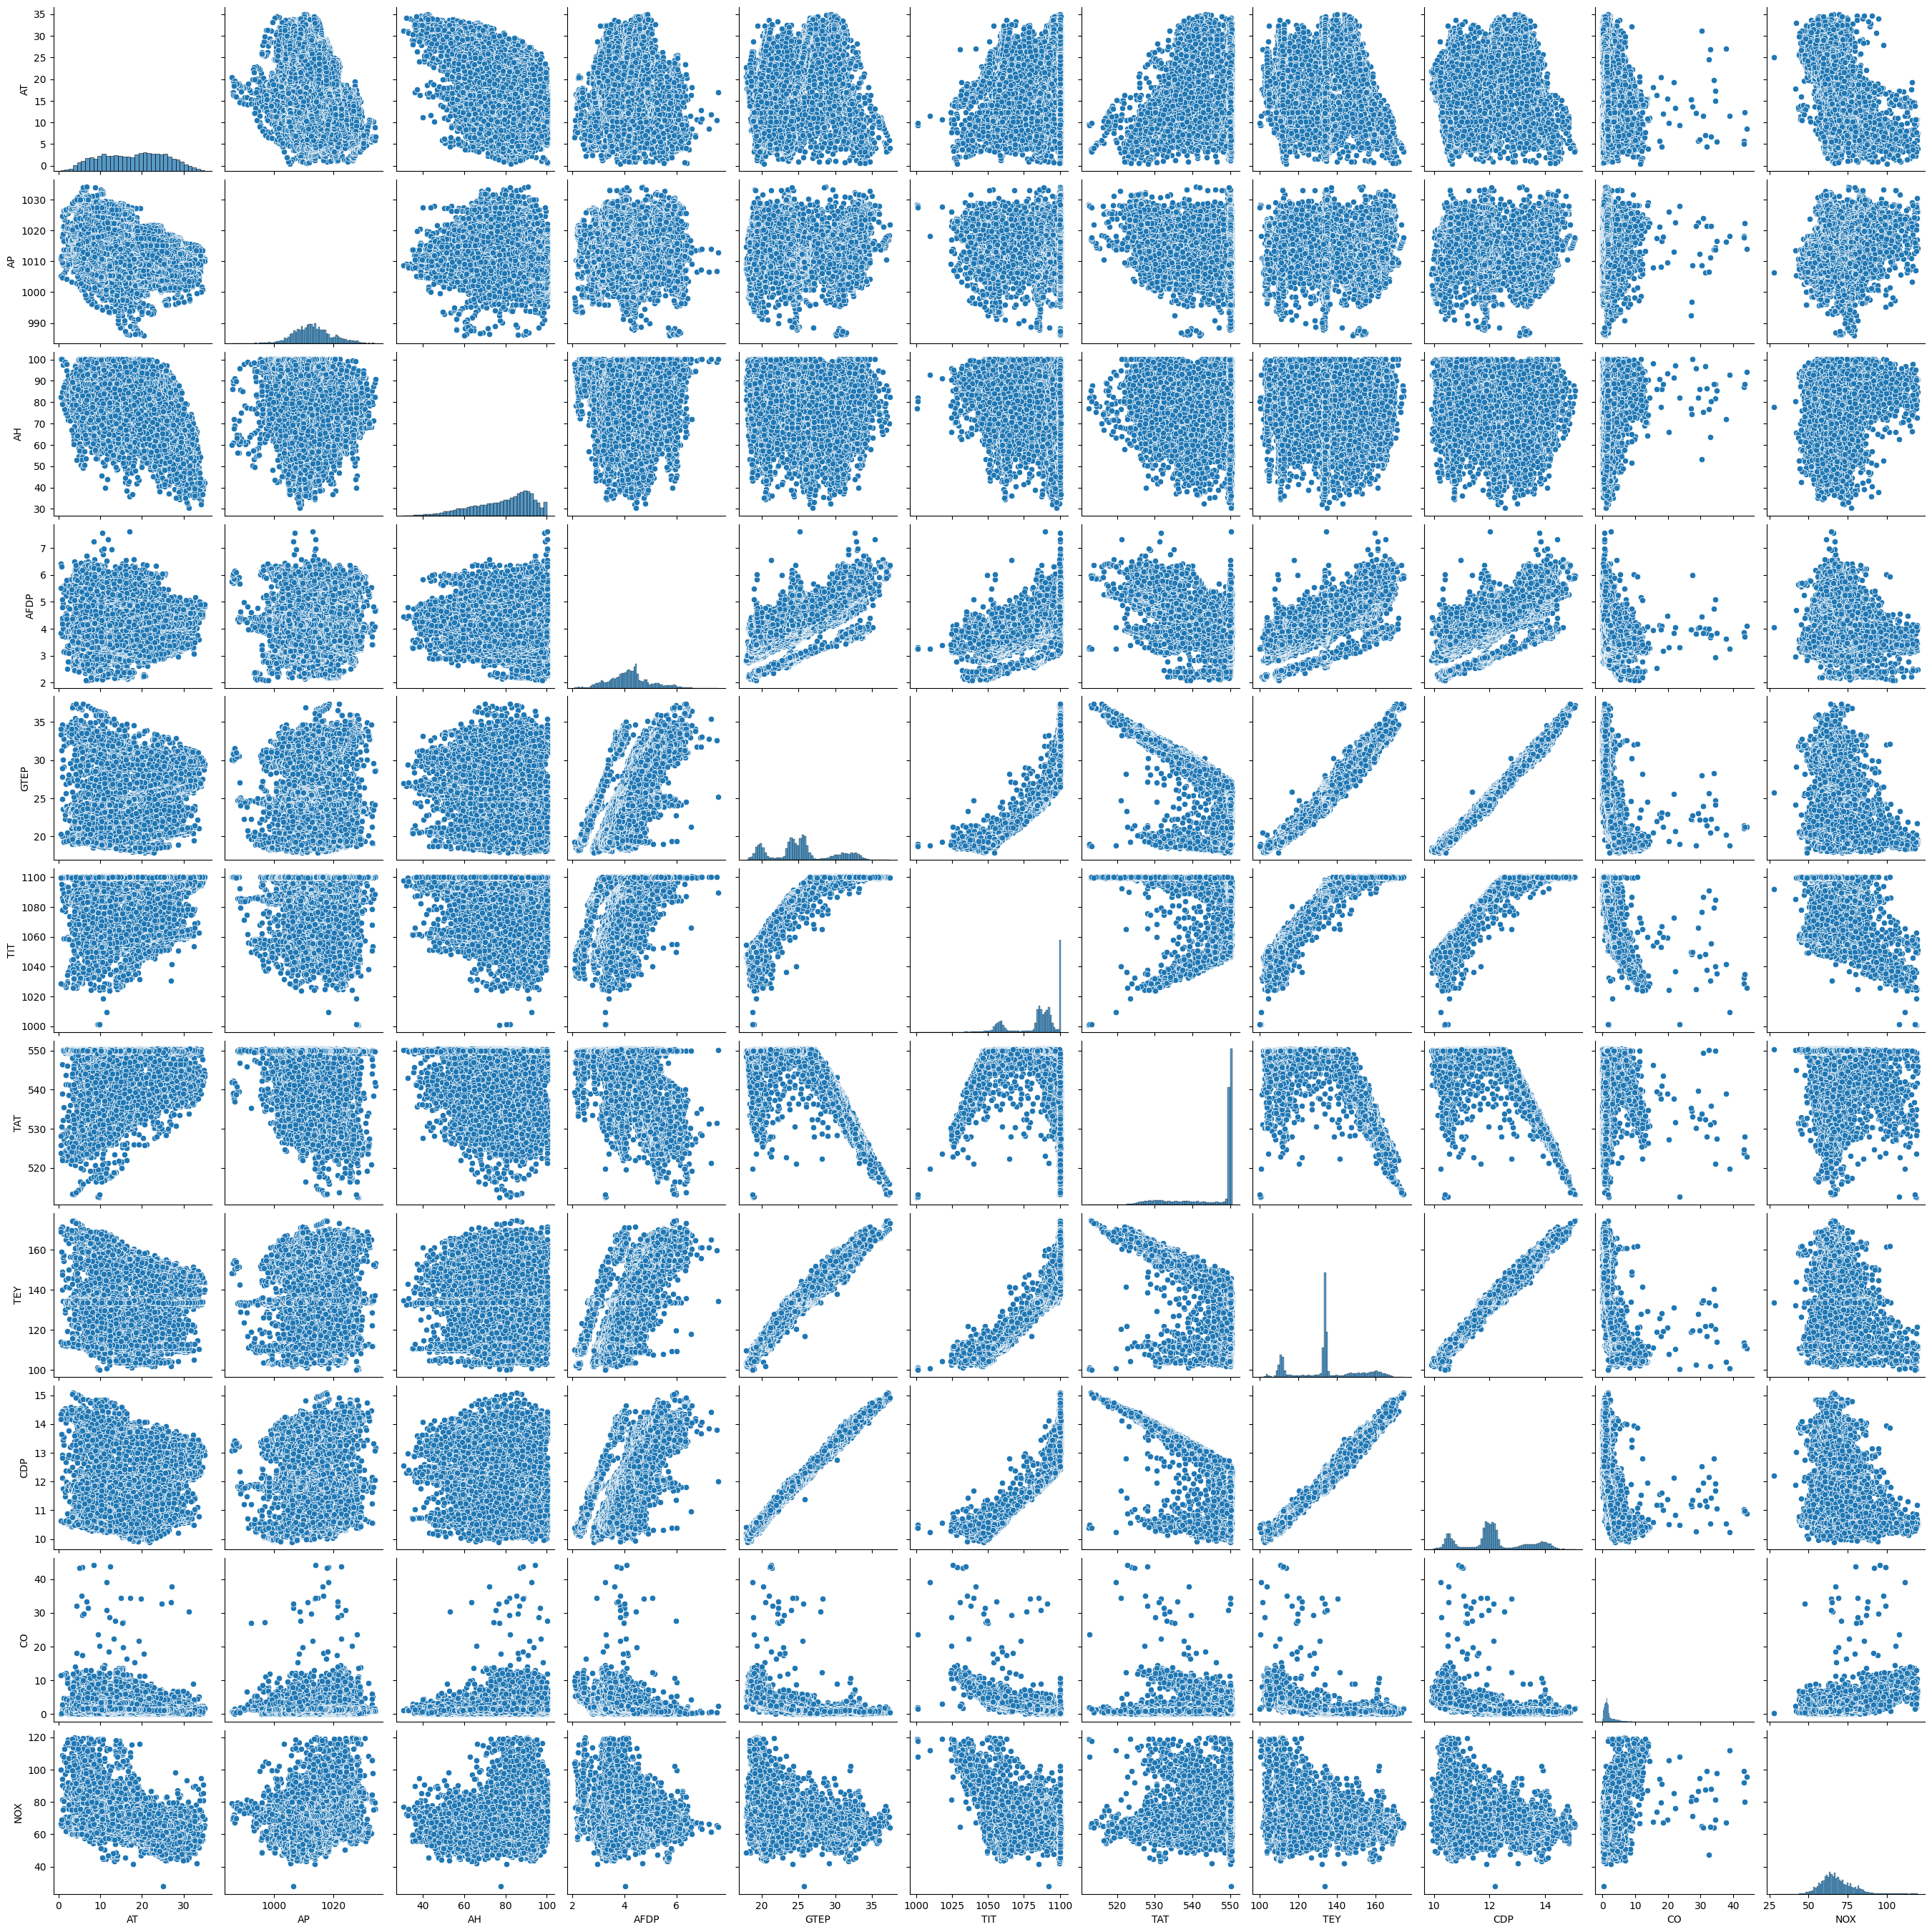

In [15]:
sns.pairplot(data)

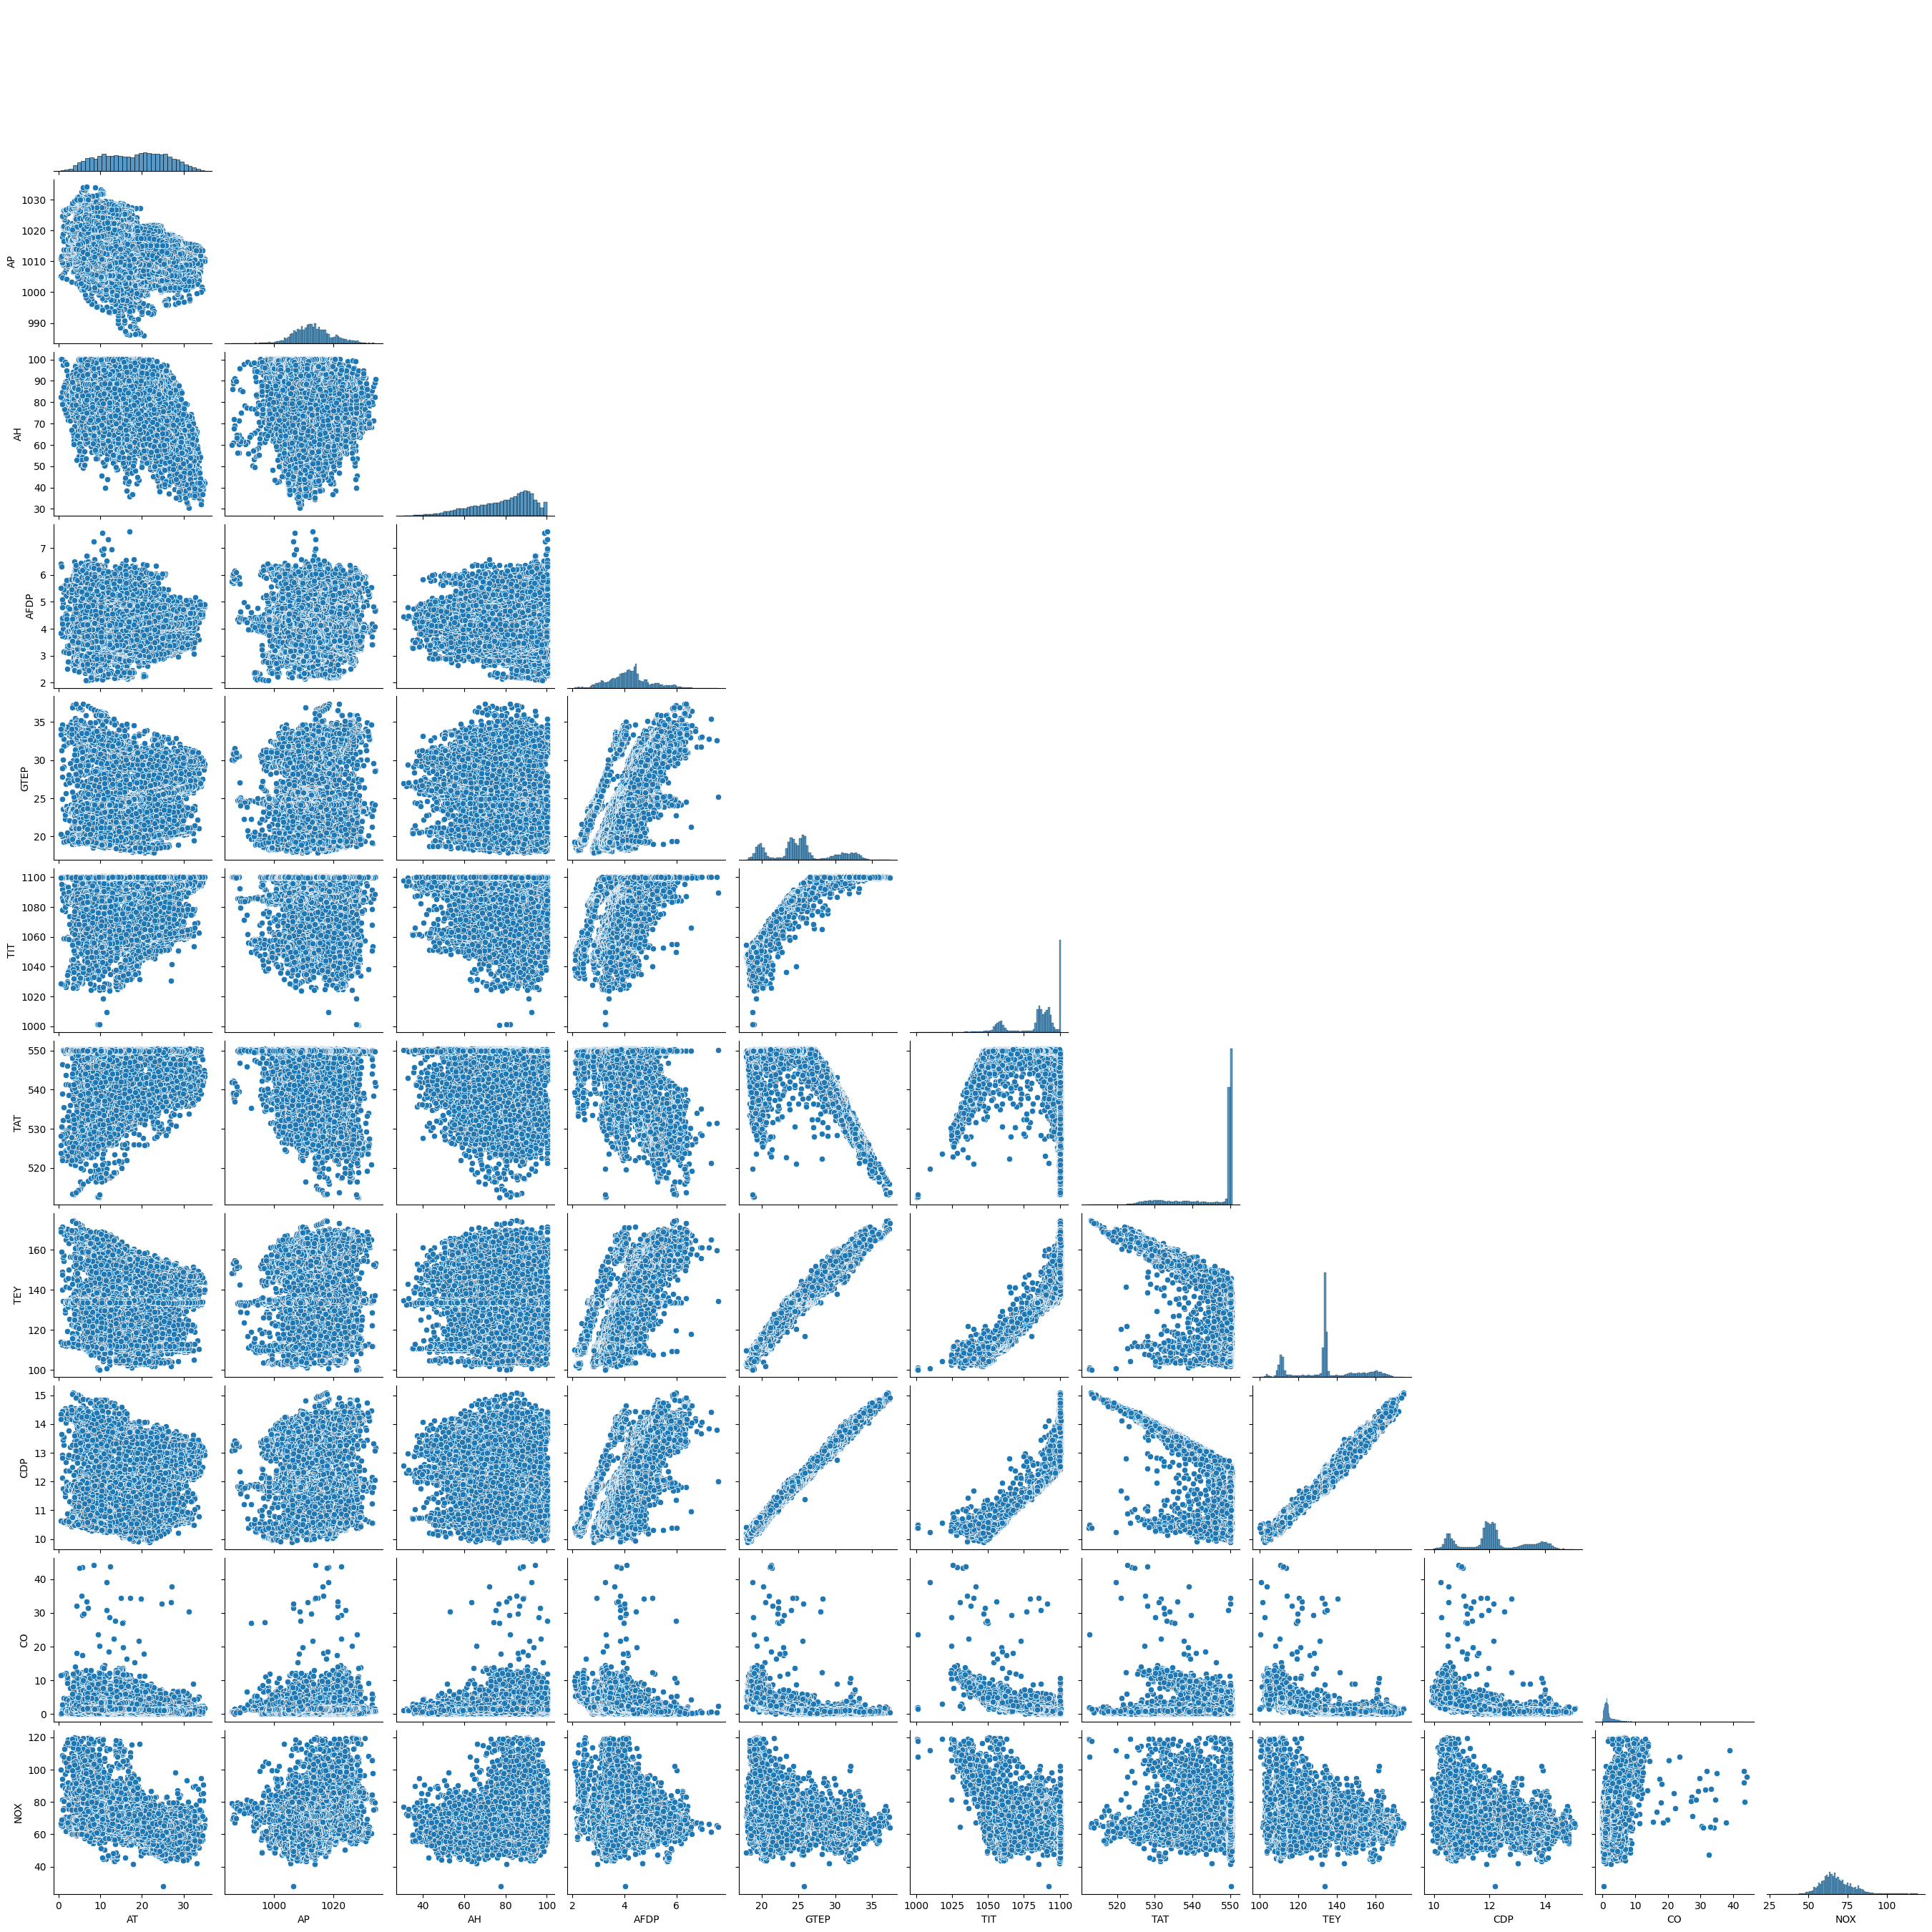

In [16]:
sns.pairplot(data, corner = True)

<Axes: >

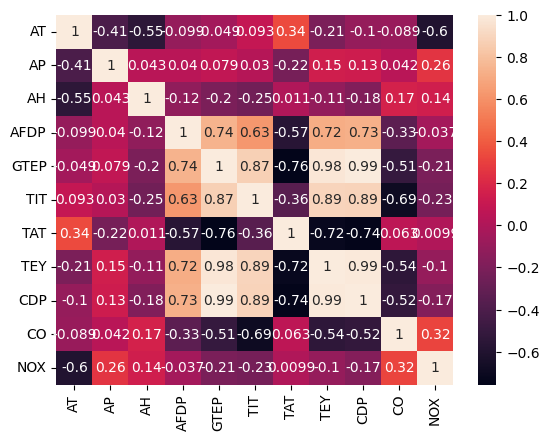

In [17]:
sns.heatmap(data.corr(), annot = True)

# Feature selection technique

In [18]:
from numpy import set_printoptions

In [19]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [20]:
x = data.drop('TEY', axis = 1)
y = data.TEY

In [21]:
test = SelectKBest(score_func = mutual_info_regression, k = 'all')
fit = test.fit(x,y)

In [22]:
scores = fit.scores_

features = fit.transform(x)

In [23]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
                        columns = ['Score','Feature'])
score_df.sort_values(by = 'Score', ascending = False, inplace = True)
score_df

Score Feature
7  1.712725     CDP
4  1.599938    GTEP
5  1.323420     TIT
6  0.893509     TAT
3  0.660347    AFDP
8  0.512716      CO
0  0.412289      AT
9  0.300424     NOX
1  0.137983      AP
2  0.097736      AH

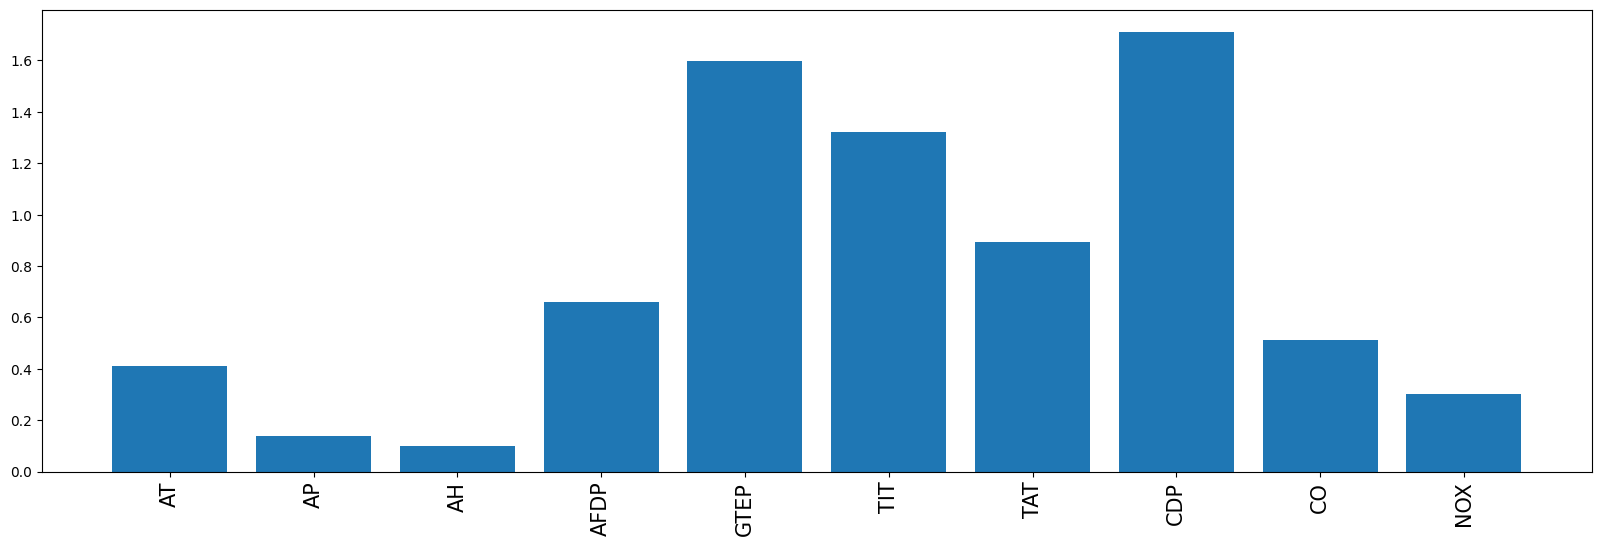

In [24]:
fig, axes = plt.subplots(figsize = (20,6))
plt.bar([i for i in range(len(scores))], scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

In [25]:
model_data = data[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

CDP    GTEP     TIT     TAT    AFDP      CO      AT     TEY
0  10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1  10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2  10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3  10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4  10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978  114.72

# Data pre-processing

In [26]:
continous_feature = [feature for feature in model_data.columns if model_data[feature].dtype != '0']
print('Continous feature count {}'.format(len(continous_feature)))

Continous feature count 8


In [27]:
df_std = model_data.copy()
features = df_std[continous_feature]

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
df_std[continous_feature] = scaler.fit_transform(features.values)
df_std.head()

CDP      GTEP       TIT       TAT      AFDP        CO        AT  \
0 -1.357331 -1.379101 -1.488376  0.585240 -0.921232  0.532012 -1.439778   
1 -1.363676 -1.363528 -1.482325  0.585240 -0.921495  0.568733 -1.449601   
2 -1.360957 -1.351309 -1.476275  0.568715 -0.944385  0.552938 -1.434721   
3 -1.356424 -1.348194 -1.464173  0.583969 -0.946884  0.548933 -1.413702   
4 -1.350985 -1.354663 -1.458123  0.582698 -0.924389  0.574179 -1.368693   

        TEY  
0 -1.231172  
1 -1.229909  
2 -1.230541  
3 -1.229909  
4 -1.229909

In [30]:
print('Mean' '\n', np.round(df_std.mean(),1), '\n' 'Standard deviation','\n', np.round(df_std.std()),1)

Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64 
Standard deviation 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


In [31]:
x = df_std.drop('TEY', axis = 1)
y = df_std.TEY

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

# Hyperparameter Tuning

## Hyperparameter Tuning: optimal leanring rate, number of layers and neurons

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
from keras.optimizers import Adam

In [36]:
from kerastuner.tuners import RandomSearch

In [145]:
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import np_utils
from keras.constraints import MaxNorm

In [50]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units = hp.Int('units' + str(i),
                                              min_value = 32, 
                                              max_value = 100,
                                              step = 32),
                  activation = 'relu'))
        model.add(layers.Dense(1, activation = 'linear'))
        model.compile(
            optimizer = keras.optimizers.Adam(
                hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
            loss = 'mean_absolute_error',
            metrics = ['mean_absolute_error'])
        return model

In [52]:
tuner = RandomSearch(build_model, objective = 'val_mean_absolute_error', max_trials = 5,
                     executions_per_trial = 3, directory = 'project', 
                     project_name = 'Gas Turbine')

In [53]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [54]:
tuner.search(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Trial 5 Complete [00h 06m 48s]
val_mean_absolute_error: 0.02658856101334095

Best val_mean_absolute_error So Far: 0.02459682896733284
Total elapsed time: 00h 32m 27s


In [55]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 2 summary
Hyperparameters:
num_layers: 13
units0: 64
learning_rate: 0.001
Score: 0.02459682896733284

Trial 4 summary
Hyperparameters:
num_layers: 20
units0: 64
learning_rate: 0.0001
Score: 0.02658856101334095

Trial 3 summary
Hyperparameters:
num_layers: 9
units0: 64
learning_rate: 0.01
Score: 0.027589377636710804

Trial 0 summary
Hyperparameters:
num_layers: 9
units0: 32
learning_rate: 0.01
Score: 0.027664650852481525

Trial 1 summary
Hyperparameters:
num_layers: 13
units0: 32
learning_rate: 0.0001
Score: 0.029642248526215553


## Hyperparameter Tuning: Optimal Batch_size, number of epochs

In [56]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [60]:
from scikeras.wrappers import KerasRegressor, KerasClassifier

In [65]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV

In [66]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [67]:
grid_result = grid.fit(x_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.997 total time=  10.4s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.992 total time=  10.2s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.997 total time=  11.3s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.995 total time=  12.5s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.995 total time=  13.9s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

In [68]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9982445767697762, using {'batch_size': 50, 'epochs': 100}
0.9952550528803876,0.0017719767200155237 with {'batch_size': 10, 'epochs': 10}
0.9972060051181743,0.0009493630097765596 with {'batch_size': 10, 'epochs': 50}
0.9976875353795147,0.0003600848839819376 with {'batch_size': 10, 'epochs': 100}
0.998030023075877,0.0001968914818105593 with {'batch_size': 10, 'epochs': 200}
0.9974358261529899,0.0005717045020967511 with {'batch_size': 20, 'epochs': 10}
0.9953407496938509,0.002072249885255286 with {'batch_size': 20, 'epochs': 50}
0.9977814030725483,0.0005018546470296134 with {'batch_size': 20, 'epochs': 100}
0.9980616473874996,0.00023917085557214544 with {'batch_size': 20, 'epochs': 200}
0.9964081235923985,0.0009442050180982058 with {'batch_size': 40, 'epochs': 10}
0.9976714455158294,0.0003154855988516181 with {'batch_size': 40, 'epochs': 50}
0.9979563052207483,0.0004107032504342975 with {'batch_size': 40, 'epochs': 100}
0.9980635469622563,0.00015712256682451356 with {'batch_size': 

## Hyperparameter Tuning: Optimal Dropout rate

In [93]:
def create_model(dropout_rate= 0.0):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [98]:
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
model2=KerasRegressor(build_fn=create_model, dropout_rate = dropout_rate, batch_size=40,epochs=200,verbose=0)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [99]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................


[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=0.998 total time= 1.0min
[CV 2/5; 1/6] START dropout_rate=0.0............................................


[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=0.997 total time= 1.0min
[CV 3/5; 1/6] START dropout_rate=0.0............................................


[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.998 total time= 1.1min
[CV 4/5; 1/6] START dropout_rate=0.0............................................


[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=0.998 total time= 1.1min
[CV 5/5; 1/6] START dropout_rate=0.0............................................


[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=0.998 total time= 1.1min
[CV 1/5; 2/6] START dropout_rate=0.1............................................


[CV 1/5; 2/6] END .............dropout_rate=0.1;, score=0.957 total time= 1.7min
[CV 2/5; 2/6] START dropout_rate=0.1............................................


[CV 2/5; 2/6] END .............dropout_rate=0.1;, score=0.936 total time= 2.3min
[CV 3/5; 2/6] START dropout_rate=0.1............................................


[CV 3/5; 2/6] END .............dropout_rate=0.1;, score=0.865 total time= 2.1min
[CV 4/5; 2/6] START dropout_rate=0.1............................................


[CV 4/5; 2/6] END .............dropout_rate=0.1;, score=0.978 total time= 1.7min
[CV 5/5; 2/6] START dropout_rate=0.1............................................


[CV 5/5; 2/6] END .............dropout_rate=0.1;, score=0.967 total time= 1.7min
[CV 1/5; 3/6] START dropout_rate=0.2............................................


[CV 1/5; 3/6] END .............dropout_rate=0.2;, score=0.933 total time= 1.7min
[CV 2/5; 3/6] START dropout_rate=0.2............................................


[CV 2/5; 3/6] END .............dropout_rate=0.2;, score=0.740 total time= 1.7min
[CV 3/5; 3/6] START dropout_rate=0.2............................................
[CV 3/5; 3/6] END .............dropout_rate=0.2;, score=0.675 total time= 2.0min
[CV 4/5; 3/6] START dropout_rate=0.2............................................


[CV 4/5; 3/6] END .............dropout_rate=0.2;, score=0.902 total time= 2.3min
[CV 5/5; 3/6] START dropout_rate=0.2............................................


[CV 5/5; 3/6] END .............dropout_rate=0.2;, score=0.844 total time= 2.3min
[CV 1/5; 4/6] START dropout_rate=0.3............................................


[CV 1/5; 4/6] END .............dropout_rate=0.3;, score=0.080 total time= 2.3min
[CV 2/5; 4/6] START dropout_rate=0.3............................................


[CV 2/5; 4/6] END .............dropout_rate=0.3;, score=0.134 total time= 2.3min
[CV 3/5; 4/6] START dropout_rate=0.3............................................


[CV 3/5; 4/6] END .............dropout_rate=0.3;, score=0.219 total time= 2.3min
[CV 4/5; 4/6] START dropout_rate=0.3............................................


[CV 4/5; 4/6] END .............dropout_rate=0.3;, score=0.119 total time= 2.4min
[CV 5/5; 4/6] START dropout_rate=0.3............................................


[CV 5/5; 4/6] END .............dropout_rate=0.3;, score=0.138 total time= 2.2min
[CV 1/5; 5/6] START dropout_rate=0.4............................................


[CV 1/5; 5/6] END .............dropout_rate=0.4;, score=0.089 total time= 1.5min
[CV 2/5; 5/6] START dropout_rate=0.4............................................


[CV 2/5; 5/6] END ............dropout_rate=0.4;, score=-0.144 total time= 1.7min
[CV 3/5; 5/6] START dropout_rate=0.4............................................


[CV 3/5; 5/6] END .............dropout_rate=0.4;, score=0.161 total time= 1.8min
[CV 4/5; 5/6] START dropout_rate=0.4............................................


[CV 4/5; 5/6] END .............dropout_rate=0.4;, score=0.097 total time= 1.7min
[CV 5/5; 5/6] START dropout_rate=0.4............................................
[CV 5/5; 5/6] END .............dropout_rate=0.4;, score=0.102 total time= 1.7min
[CV 1/5; 6/6] START dropout_rate=0.5............................................


[CV 1/5; 6/6] END ............dropout_rate=0.5;, score=-0.181 total time= 1.7min
[CV 2/5; 6/6] START dropout_rate=0.5............................................


[CV 2/5; 6/6] END ............dropout_rate=0.5;, score=-0.033 total time= 1.7min
[CV 3/5; 6/6] START dropout_rate=0.5............................................


[CV 3/5; 6/6] END .............dropout_rate=0.5;, score=0.080 total time= 1.7min
[CV 4/5; 6/6] START dropout_rate=0.5............................................


[CV 4/5; 6/6] END ............dropout_rate=0.5;, score=-0.495 total time= 1.7min
[CV 5/5; 6/6] START dropout_rate=0.5............................................


[CV 5/5; 6/6] END ............dropout_rate=0.5;, score=-0.148 total time= 1.7min


In [100]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9977019093882568, using {'dropout_rate': 0.0}
0.9977019093882568,0.000239792919512734 with {'dropout_rate': 0.0}
0.9408350129167868,0.04019030502810911 with {'dropout_rate': 0.1}
0.8189089774608787,0.09743336751032106 with {'dropout_rate': 0.2}
0.13822494496777915,0.04541015617227116 with {'dropout_rate': 0.3}
0.06105571690541818,0.10562255149461622 with {'dropout_rate': 0.4}
-0.15543114173586683,0.1932214098661151 with {'dropout_rate': 0.5}


## Hyperparameter Tuning: Optimal Activation function and kernel initializer

In [101]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [106]:
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
model3=KerasRegressor(build_fn=create_model,activation_function = activation_function, init = init, batch_size=40,epochs=200,verbose=0)
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [107]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................


[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=0.257 total time= 1.5min
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................


[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=0.305 total time= 1.9min
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.218 total time= 1.9min
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................


[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=0.185 total time= 1.8min
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................


[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=0.274 total time= 1.7min
[CV 1/5; 2/9] START activation_function=softmax, init=uniform...................


[CV 1/5; 2/9] END activation_function=softmax, init=uniform;, score=0.251 total time= 1.7min
[CV 2/5; 2/9] START activation_function=softmax, init=uniform...................


[CV 2/5; 2/9] END activation_function=softmax, init=uniform;, score=0.262 total time= 1.7min
[CV 3/5; 2/9] START activation_function=softmax, init=uniform...................


[CV 3/5; 2/9] END activation_function=softmax, init=uniform;, score=0.206 total time= 1.7min
[CV 4/5; 2/9] START activation_function=softmax, init=uniform...................


[CV 4/5; 2/9] END activation_function=softmax, init=uniform;, score=0.335 total time= 1.6min
[CV 5/5; 2/9] START activation_function=softmax, init=uniform...................
[CV 5/5; 2/9] END activation_function=softmax, init=uniform;, score=0.329 total time= 1.6min
[CV 1/5; 3/9] START activation_function=softmax, init=zero......................


[CV 1/5; 3/9] END activation_function=softmax, init=zero;, score=0.177 total time= 1.6min
[CV 2/5; 3/9] START activation_function=softmax, init=zero......................
[CV 2/5; 3/9] END activation_function=softmax, init=zero;, score=0.197 total time= 1.8min
[CV 3/5; 3/9] START activation_function=softmax, init=zero......................


[CV 3/5; 3/9] END activation_function=softmax, init=zero;, score=0.173 total time= 1.9min
[CV 4/5; 3/9] START activation_function=softmax, init=zero......................


[CV 4/5; 3/9] END activation_function=softmax, init=zero;, score=0.259 total time= 1.9min
[CV 5/5; 3/9] START activation_function=softmax, init=zero......................
[CV 5/5; 3/9] END activation_function=softmax, init=zero;, score=0.262 total time= 2.0min
[CV 1/5; 4/9] START activation_function=tanh, init=normal.......................


[CV 1/5; 4/9] END activation_function=tanh, init=normal;, score=0.178 total time= 2.0min
[CV 2/5; 4/9] START activation_function=tanh, init=normal.......................


[CV 2/5; 4/9] END activation_function=tanh, init=normal;, score=0.605 total time= 2.1min
[CV 3/5; 4/9] START activation_function=tanh, init=normal.......................


[CV 3/5; 4/9] END activation_function=tanh, init=normal;, score=0.816 total time= 2.4min
[CV 4/5; 4/9] START activation_function=tanh, init=normal.......................


[CV 4/5; 4/9] END activation_function=tanh, init=normal;, score=0.280 total time= 2.3min
[CV 5/5; 4/9] START activation_function=tanh, init=normal.......................


[CV 5/5; 4/9] END activation_function=tanh, init=normal;, score=0.471 total time= 2.3min
[CV 1/5; 5/9] START activation_function=tanh, init=uniform......................


[CV 1/5; 5/9] END activation_function=tanh, init=uniform;, score=0.585 total time= 2.5min
[CV 2/5; 5/9] START activation_function=tanh, init=uniform......................


[CV 2/5; 5/9] END activation_function=tanh, init=uniform;, score=-0.035 total time= 2.3min
[CV 3/5; 5/9] START activation_function=tanh, init=uniform......................


[CV 3/5; 5/9] END activation_function=tanh, init=uniform;, score=0.324 total time= 2.5min
[CV 4/5; 5/9] START activation_function=tanh, init=uniform......................


[CV 4/5; 5/9] END activation_function=tanh, init=uniform;, score=0.244 total time= 2.3min
[CV 5/5; 5/9] START activation_function=tanh, init=uniform......................


[CV 5/5; 5/9] END activation_function=tanh, init=uniform;, score=0.316 total time= 2.4min
[CV 1/5; 6/9] START activation_function=tanh, init=zero.........................


[CV 1/5; 6/9] END activation_function=tanh, init=zero;, score=0.196 total time= 2.4min
[CV 2/5; 6/9] START activation_function=tanh, init=zero.........................


[CV 2/5; 6/9] END activation_function=tanh, init=zero;, score=0.059 total time= 2.4min
[CV 3/5; 6/9] START activation_function=tanh, init=zero.........................


[CV 3/5; 6/9] END activation_function=tanh, init=zero;, score=0.217 total time= 1.8min
[CV 4/5; 6/9] START activation_function=tanh, init=zero.........................


[CV 4/5; 6/9] END activation_function=tanh, init=zero;, score=0.159 total time= 1.7min
[CV 5/5; 6/9] START activation_function=tanh, init=zero.........................


[CV 5/5; 6/9] END activation_function=tanh, init=zero;, score=0.223 total time= 1.7min
[CV 1/5; 7/9] START activation_function=relu, init=normal.......................


[CV 1/5; 7/9] END activation_function=relu, init=normal;, score=0.212 total time= 1.7min
[CV 2/5; 7/9] START activation_function=relu, init=normal.......................
[CV 2/5; 7/9] END activation_function=relu, init=normal;, score=0.180 total time= 1.7min
[CV 3/5; 7/9] START activation_function=relu, init=normal.......................


[CV 3/5; 7/9] END activation_function=relu, init=normal;, score=0.306 total time= 1.7min
[CV 4/5; 7/9] START activation_function=relu, init=normal.......................


[CV 4/5; 7/9] END activation_function=relu, init=normal;, score=0.174 total time= 1.7min
[CV 5/5; 7/9] START activation_function=relu, init=normal.......................


[CV 5/5; 7/9] END activation_function=relu, init=normal;, score=0.294 total time= 1.7min
[CV 1/5; 8/9] START activation_function=relu, init=uniform......................
[CV 1/5; 8/9] END activation_function=relu, init=uniform;, score=0.263 total time= 1.8min
[CV 2/5; 8/9] START activation_function=relu, init=uniform......................


[CV 2/5; 8/9] END activation_function=relu, init=uniform;, score=0.200 total time= 1.7min
[CV 3/5; 8/9] START activation_function=relu, init=uniform......................
[CV 3/5; 8/9] END activation_function=relu, init=uniform;, score=0.161 total time= 1.7min
[CV 4/5; 8/9] START activation_function=relu, init=uniform......................


[CV 4/5; 8/9] END activation_function=relu, init=uniform;, score=0.048 total time= 1.7min
[CV 5/5; 8/9] START activation_function=relu, init=uniform......................


[CV 5/5; 8/9] END activation_function=relu, init=uniform;, score=0.556 total time= 1.7min
[CV 1/5; 9/9] START activation_function=relu, init=zero.........................


[CV 1/5; 9/9] END activation_function=relu, init=zero;, score=0.038 total time= 1.7min
[CV 2/5; 9/9] START activation_function=relu, init=zero.........................


[CV 2/5; 9/9] END activation_function=relu, init=zero;, score=0.095 total time= 1.7min
[CV 3/5; 9/9] START activation_function=relu, init=zero.........................


[CV 3/5; 9/9] END activation_function=relu, init=zero;, score=0.263 total time= 1.7min
[CV 4/5; 9/9] START activation_function=relu, init=zero.........................
[CV 4/5; 9/9] END activation_function=relu, init=zero;, score=-0.065 total time= 1.7min
[CV 5/5; 9/9] START activation_function=relu, init=zero.........................


[CV 5/5; 9/9] END activation_function=relu, init=zero;, score=0.934 total time= 1.7min


In [108]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.4700993085213264, using {'activation_function': 'tanh', 'init': 'normal'}
0.2477424806786095,0.04224667273793817 with {'activation_function': 'softmax', 'init': 'normal'}
0.2768009752841983,0.048855646347829206 with {'activation_function': 'softmax', 'init': 'uniform'}
0.21375537460401833,0.03913558634664542 with {'activation_function': 'softmax', 'init': 'zero'}
0.4700993085213264,0.2277562438835292 with {'activation_function': 'tanh', 'init': 'normal'}
0.28665655467548784,0.19806104086005122 with {'activation_function': 'tanh', 'init': 'uniform'}
0.1709239575343136,0.06003167296089309 with {'activation_function': 'tanh', 'init': 'zero'}
0.23322128592215902,0.05608263787106581 with {'activation_function': 'relu', 'init': 'normal'}
0.24571580225701192,0.17034131319773702 with {'activation_function': 'relu', 'init': 'uniform'}
0.253182182491992,0.35681181029908104 with {'activation_function': 'relu', 'init': 'zero'}


# Model building with neural network

In [109]:
model_data.head()

CDP    GTEP     TIT     TAT    AFDP      CO      AT     TEY
0  10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1  10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2  10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3  10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4  10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978  114.72

In [110]:
x = model_data.drop('TEY', axis = 1)
y = model_data.TEY

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train)
x_test_scaled = scaler_test.fit_transform(x_test)

In [113]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031,)
(3008,)


In [122]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 1s 3ms/step - loss: 17604.8574 - mae: 131.7244 - mse: 17604.8574 - val_loss: 16753.0781 - val_mae: 128.4726 - val_mse: 16753.0781
Epoch 2/100
169/169 [==============================] - 0s 2ms/step - loss: 16257.0547 - mae: 126.5080 - mse: 16257.0547 - val_loss: 15701.4727 - val_mae: 124.3121 - val_mse: 15701.4727
Epoch 3/100
169/169 [==============================] - 0s 2ms/step - loss: 15283.1934 - mae: 122.6008 - mse: 15283.1934 - val_loss: 14784.3057 - val_mae: 120.5667 - val_mse: 14784.3057
Epoch 4/100
169/169 [==============================] - 0s 3ms/step - loss: 14400.0703 - mae: 118.9445 - mse: 14400.0703 - val_loss: 13933.0547 - val_mae: 116.9832 - val_mse: 13933.0547
Epoch 5/100
169/169 [==============================] - 0s 2ms/step - loss: 13572.6279 - mae: 115.4133 - mse: 13572.6279 - val_loss: 13130.3896 - val_mae: 113.5007 - val_mse: 13130.3896
Epoch 6/100
169/169 [==============================] - 0s 3ms/step - loss: 

## Model Evaluation

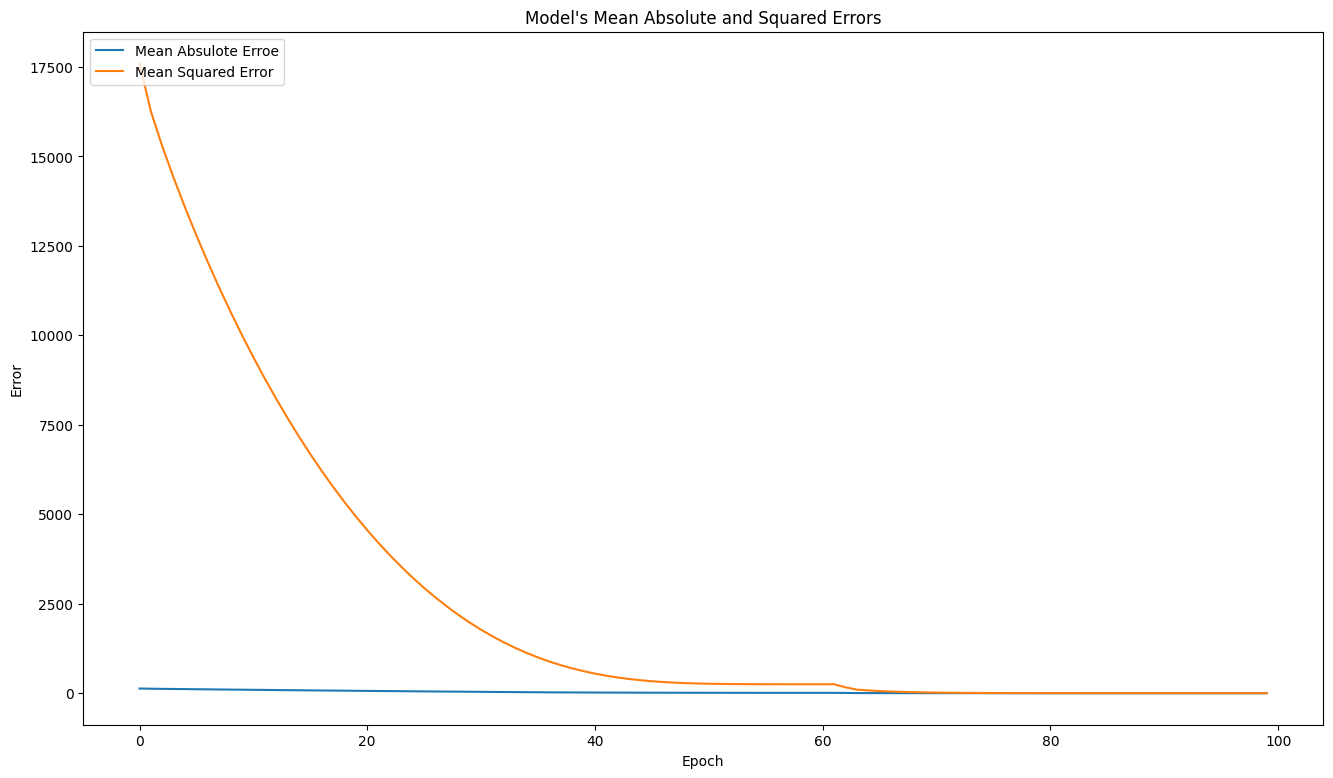

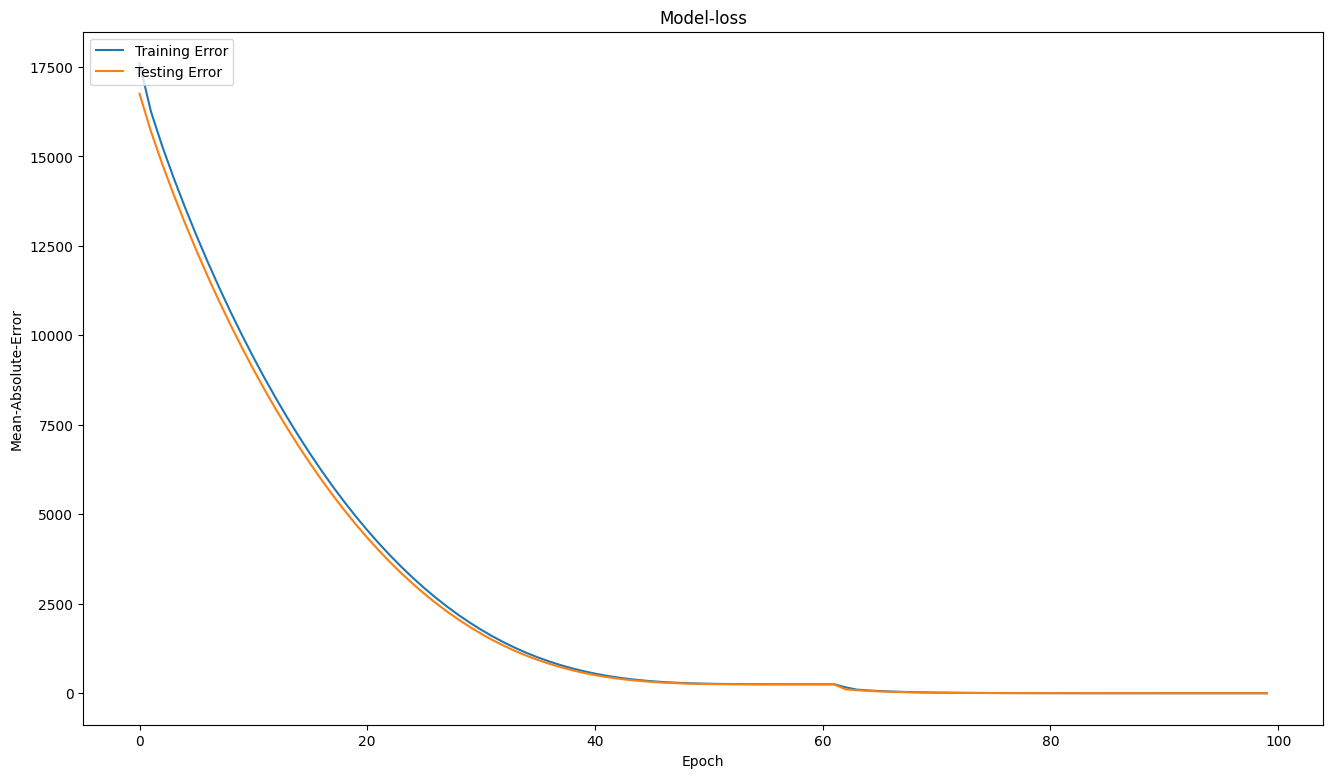

In [123]:
plt.figure(figsize=(16,9))
plt.plot(model.history.history['mae'])
plt.plot(model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

In [124]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


CDP    GTEP     TIT     TAT    AFDP        CO       AT  Actual  \
13312  12.219  25.762  1092.5  550.25  4.0023   1.26430  24.0930  134.46   
12627  10.791  20.085  1059.6  549.94  3.2106   2.69370  20.4500  111.88   
6393   12.126  25.221  1089.9  549.62  4.5325   1.96250  20.2620  133.72   
4990   12.218  25.965  1092.9  549.96  4.4266   1.57120  26.8620  133.79   
12462  10.466  19.688  1056.9  550.01  3.1241   2.29960  19.4090  110.77   
7405   10.624  19.387  1058.9  550.17  3.3709   4.27640   2.2158  113.32   
10993  12.088  25.392  1089.7  550.11  3.7871   0.83578  23.8520  133.77   
9488   11.498  23.225  1079.4  549.60  4.2837   2.01980  12.3950  128.98   
14201  13.971  32.518  1100.1  528.98  5.1559   0.87760  12.3590  159.42   
9757   13.862  32.105  1100.0  530.69  5.9309  10.75000   8.6376  161.86   

        Predicted  
13312  134.626160  
12627  112.568924  
6393   134.257141  
4990   134.102463  
12462  110.861458  
7405   114.446693  
10993  133.680557  
9488   128.827194  
14201  160.939011  
9757   160.360733

In [125]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

In [126]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.6227724689987


Actual   Predicted     APE %
13312  134.46  134.626160  0.123576
12627  111.88  112.568924  0.615770
6393   133.72  134.257141  0.401691
4990   133.79  134.102463  0.233547
12462  110.77  110.861458  0.082566

In [127]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

Actual   Predicted     APE %     Error
0     134.46  134.626160  0.123576 -0.001236
1     111.88  112.568924  0.615770 -0.006158
2     133.72  134.257141  0.401691 -0.004017
3     133.79  134.102463  0.233547 -0.002335
4     110.77  110.861458  0.082566 -0.000826
...      ...         ...       ...       ...
3003  119.25  119.241661  0.006993  0.000070
3004  133.74  134.158218  0.312710 -0.003127
3005  146.31  146.801788  0.336128 -0.003361
3006  150.07  150.240128  0.113365 -0.001134
3007  111.77  111.468941  0.269356  0.002694

[3008 rows x 4 columns]

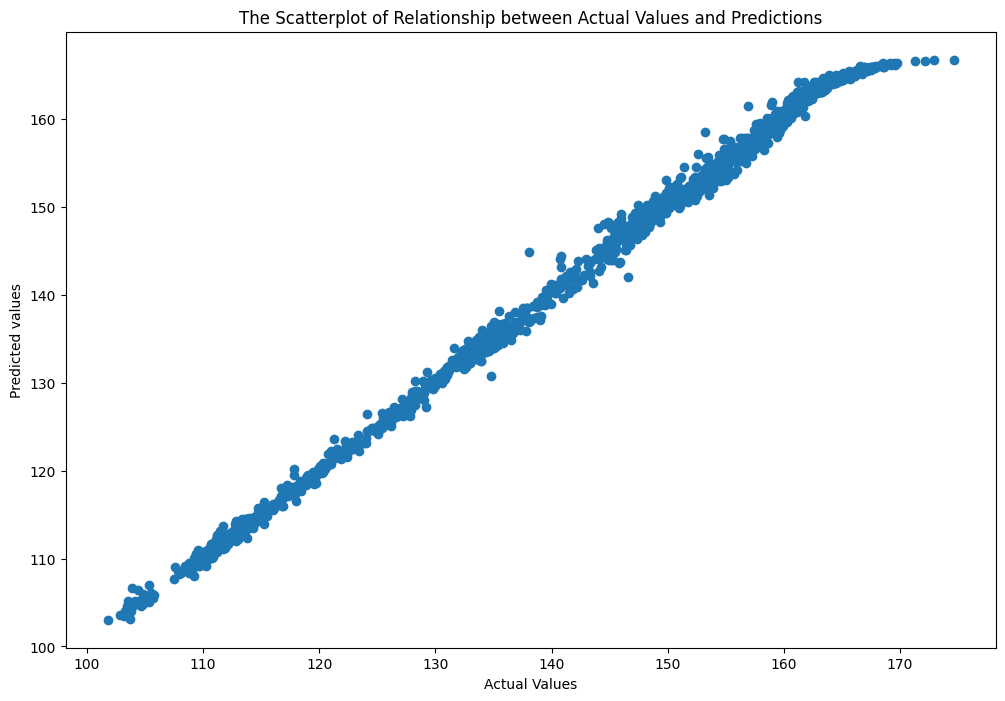

In [128]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [129]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.5166489178069096
MSE: 0.5839741726544262
RMSE: 0.7641820284817133


In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 1ms/step
R2_score (train):  0.9978298344701857
R2_score (test):  0.9976677380716996


In [131]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))) 

This shows our model predict % 99.78 of the target correctly


In [133]:
y_test.shape

(3008,)

In [135]:
y_predict_test.shape

(3008, 1)

In [140]:
yp = np.squeeze(y_predict_test)

In [141]:
yp.shape

(3008,)

In [139]:
y_predict_test.shape

(3008, 1)

In [142]:
new = y_test - yp
new.shape

(3008,)

<Axes: xlabel='TEY', ylabel='Density'>

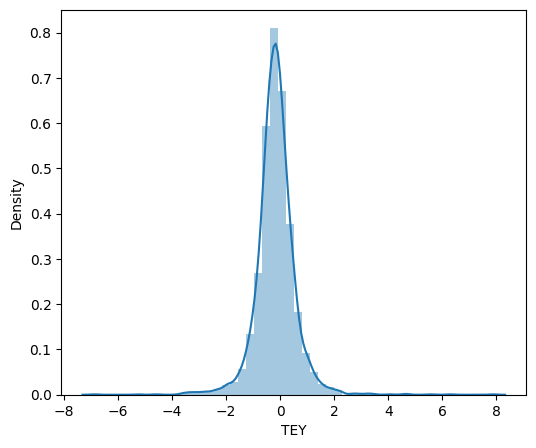

In [144]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(6,5))
sns.distplot(y_test-yp,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data